# Online News Popularity Dataset

<h3>I would like to look at data from online news site Mashable.com to determine how different aspects of each news article affect its popularity, expressed by number of shares.</h3>
<h4>https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity </h4>

This set of data provided by UCI's Machine Learning Repository describes a number of news articles posted on Mashable.com before January 8, 2015. With 39644 data entries and 61 descriptive attributes, there is plenty to compare. The attribute types vary, relating to content, length, keywords, when the article was posted, and sentiment. I am especially interested in what helps make a Mashable.com news posting more shareable, and what is important or not important to focus on when writing and putting together a new article.

![title](mashable_banner.jpg)

## Everything is made up and the points don't matter.

My goal to guide what Mashable.com toward more shares proved to be a difficult task. At the first look at the data correlations, the numbers were weak. That didn't mean that I couldn't find value in the correlations, however. Ultimately, the df.corr() function led me not to find specifically what creates more <i>shares</i>, but rather to find, more generally, <b>what we should invest in and what we should avoid</b>.

#### Let's see what happened.

In [170]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import iqr
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
from pylab import hist, show, xticks
from IPython.lib.display import YouTubeVideo

I cleaned up the data a little first. Import the .csv file and strip column names of whitespace.

In [104]:
original = pd.read_csv('online_news_popularity.csv')
news = original.rename(columns=lambda x: x.strip())

In [105]:
#news['url'].str.strip()
news = news.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
#stripping white space

In [106]:
pd.set_option('display.max_colwidth', -1)
#This code shows the full column widths so the urls are not truncated.

### The data.

In [107]:
news.head(8)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-video-browser/,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armbandgets-update/,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891


# Q.1 What affects the 'shares' attribute the most?

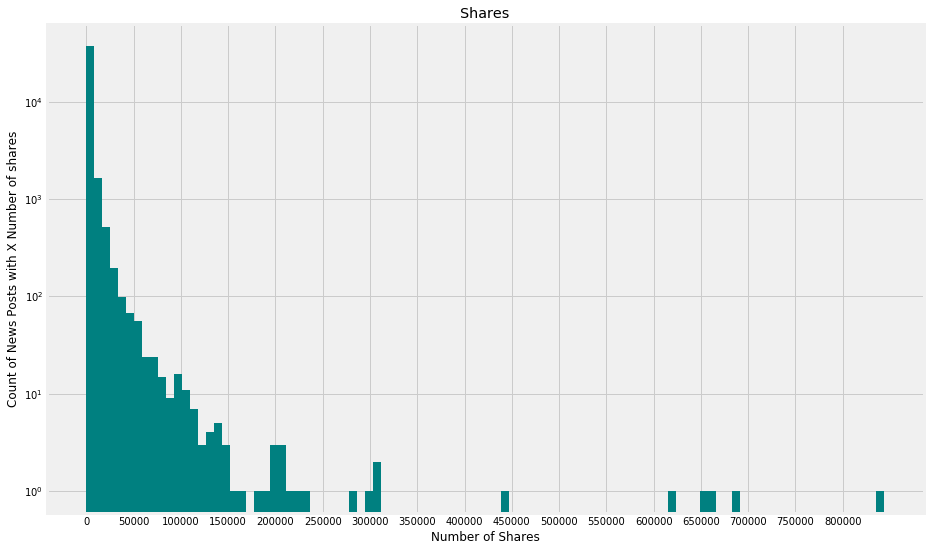

In [109]:
plt.figure(figsize=(14,9))

plt.hist(
    x=(news['shares']),
    bins=100,
    log=True,
    color = "teal"

) 

plt.title('Shares')
plt.xlabel('Number of Shares')
plt.ylabel('Count of News Posts with X Number of shares')
xticks(range(0, 843300, 50000))

plt.show()

In [110]:
print('shares min: ' + str(min(news['shares'])), 'shares max: ' + str(max(news['shares'])))

shares min: 1 shares max: 843300


Here we see it was difficult to breach ~150,000 to 200,000 for number of shares. The articles overwhelmingly stay relatively low on the list, with few outliers. Looking at just one aspect of going viral, counting the number of shares, even the Number of Shares above 800,000 would not be considered to be a viral article or video. However, that doesn't mean it has no value. Let's take a look at the data to determine what to pursue in terms of best practices for more shares.

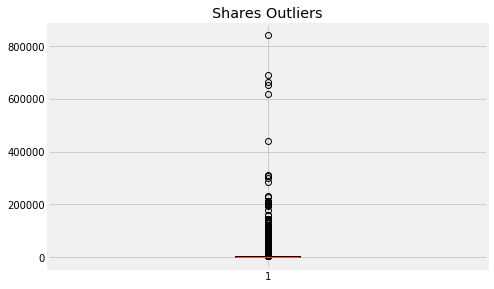

In [111]:
plt.figure(figsize=(7,4.5))
plt.boxplot(news['shares'])
plt.title('Shares Outliers')
plt.show()

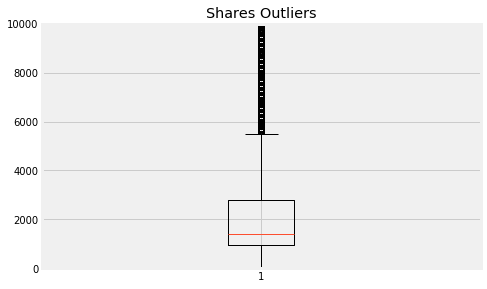

In [112]:
#Crop to zoom
plt.figure(figsize=(7,4.5))
plt.boxplot(news['shares'])
plt.title('Shares Outliers')
plt.ylim(0, 10000)
plt.show()

In [113]:
#sorting shares from highest count to lowest count
news['shares'] == max(news['shares'])
filtered_timedelta = news[news['shares'] == max(news['shares'])]
sorted_news = news.sort_values(by=['shares'], ascending=False)
# print(sorted_news['shares'])

### Top Shares:

In [114]:
#The index, count, url and data types of the max number of shares
max_shares = max(news['shares'])

print((news['shares'][news['shares'] == max_shares]),
#original shares at original shares equal to the max value of original shares!
(news['url'][news['shares'] == max_shares]))

9365    843300
Name: shares, dtype: int64 9365    http://mashable.com/2013/07/03/low-cost-iphone/
Name: url, dtype: object


In [117]:
#List top 8 urls
s_news = news.sort_values(by=['shares'], ascending=False)

print(s_news['shares'].head(8), s_news['url'].head(8))

9365     843300
5370     690400
23237    663600
16268    652900
3145     617900
16009    441000
18788    310800
4506     306100
Name: shares, dtype: int64 9365     http://mashable.com/2013/07/03/low-cost-iphone/                    
5370     http://mashable.com/2013/04/15/dove-ad-beauty-sketches/            
23237    http://mashable.com/2014/04/09/first-100-gilt-soundcloud-stitchfix/
16268    http://mashable.com/2013/11/18/kanye-west-harvard-lecture/         
3145     http://mashable.com/2013/03/02/wealth-inequality/                  
16009    http://mashable.com/2013/11/12/roomba-880-review/                  
18788    http://mashable.com/2014/01/14/australia-heatwave-photos/          
4506     http://mashable.com/2013/03/28/blackberry-1-million/               
Name: url, dtype: object


#### There are a few tech articles amongst the 8 top sharers, but no real domination by any genre. Notably, the top article is a tech consumer article.

### With a correlation table, we can see which attributes are clearly affecting each other.  Any warm colored to deep red cells indicate a strong correlation between two attributes.

In [115]:
news.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

#####  Cells with "1.0" indicate the attribute correlates 100%, which usually means the attribute was compared with itself (see the diagonal red line of cells going through the table?), so we ignore those.  Most of these strong correlations are also attributes that we already know relate to each other based on the attribute information provided with the dataset.

In [119]:
# #Remove the URL column
news = news.drop('url', axis=1)

An example of some obvious correlations that are adding the warm tones to the table are <i>global</i> rate of negatives and positives correlated with rate of positive or negative words.

Definitions include:
- global_sentiment_polarity: Text sentiment polarity 
- global_rate_positive_words: Rate of positive words in the content 
- global_rate_negative_words: Rate of negative words in the content 
- rate_positive_words: Rate of positive words among non-neutral tokens 
- rate_negative_words: Rate of negative words among non-neutral tokens

In [121]:
sentiment = news[['global_subjectivity',
                  'global_sentiment_polarity',
                  'global_rate_positive_words',
                  'global_rate_negative_words',
                  'rate_positive_words',
                  'rate_negative_words']].copy()
sentiment.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words
global_subjectivity,1.0,0.34,0.47,0.25,0.49,0.13
global_sentiment_polarity,0.34,1.0,0.57,-0.47,0.73,-0.65
global_rate_positive_words,0.47,0.57,1.0,0.11,0.63,-0.33
global_rate_negative_words,0.25,-0.47,0.11,1.0,-0.4,0.78
rate_positive_words,0.49,0.73,0.63,-0.4,1.0,-0.53
rate_negative_words,0.13,-0.65,-0.33,0.78,-0.53,1.0


A lot of this data is just not something that helps us answer our question, it's a distraction! I had to look at the smaller numbers in the cool shades.

### Most importantly, we can see the last column for 'shares' is all a very deep blue. Cue record scratch. The numbers listed are not very close to 1 at all, showing there is little correlation with all the other attributes and shares. BUT the data still tells us where to investigate more
<b>
- 0.045 is a relatively high correlation for 'kw_max_avg'</b>

### I predicted that the number of images and the number of videos in the articles would correlate with shares, and indeed they do have some of the highest correlations of all the attributes with 'shares', so let's dig deeper there.
<b>
- 0.039 'num_imgs'
- 0.024 'num_videos'</b>

# Q.2 What does 'kw_max_avg' or the "Avg. keyword (max. shares)" tell us about shares?

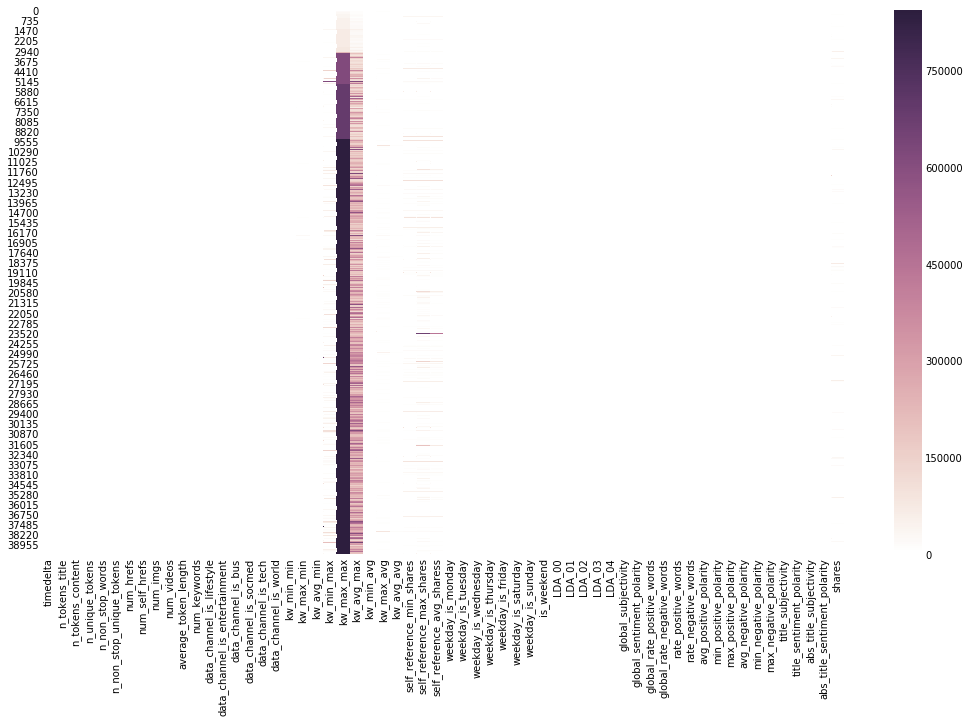

In [133]:
#Heatmap
#news.set_index('shares')
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.figure(figsize=(16,10))
sns.heatmap(news, cmap = cmap)

From a heatmap including just the highest number entries for each data entry, there is actually a lot of data near 0, which is why the heatmap is primarily white. The higher entries are again in related attributes:
- kw_max_max: Best keyword (max. shares) 
- kw_avg_max: Best keyword (avg. shares) 

kw_avg_max might be interesting to look at, but it's not clear what the keywords are from this data! However, we can still get a clearer view of the counts.

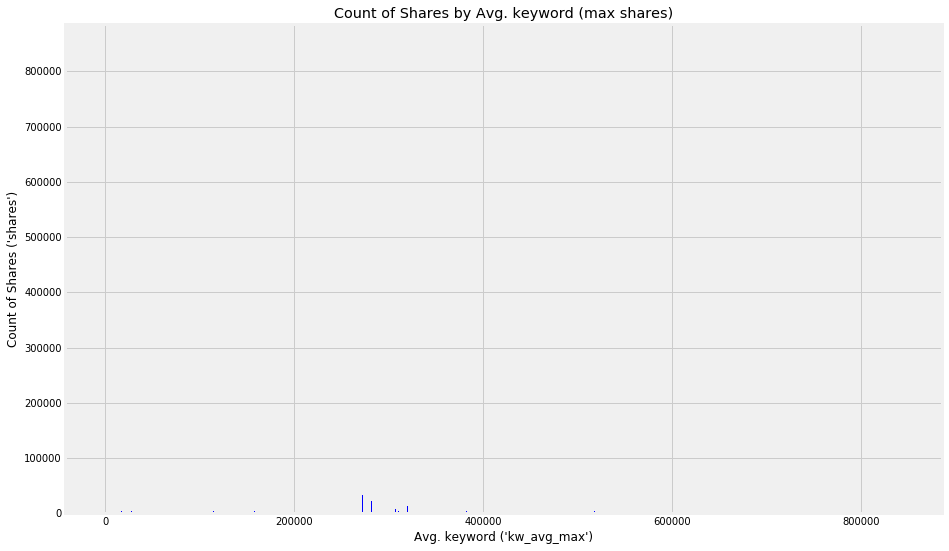

In [157]:
plt.figure(figsize=(14, 9)) 

plt.bar(
    x=np.array(news['kw_avg_max']),
    height=np.array(news['shares']),
    color='blue',
    width=1,
    alpha=1
) 
plt.title('Count of Shares by Avg. keyword (max shares)')
plt.xlabel('Avg. keyword (\'kw_avg_max\')')
plt.ylabel('Count of Shares (\'shares\')')
plt.show()

This graph definitely supports what was shown in the correlation table for this one attribute compared to shares. How pitiful.

#### Using a t-test is another way to look at the correlation between Avg. keyword (max shares) and shares. This is a two-sided test for the (null) hypothesis that 2 independent samples have identical average (expected) values. This test generally assumes that the populations have identical variances, but we tweak the method a bit below to apply Welch's t-test.

In [171]:
#setting equal_var=True to *False*, we use a Welch's t-test
stats.ttest_ind(news['kw_avg_max'], news['shares'], equal_var=False)

Ttest_indResult(statistic=375.7260290167279, pvalue=0.0)

#### The test measures whether the average (expected) value differs significantly across samples. The high number of 375 confirms this. The p-value is smaller than the threshold of 5%, so we reject the (null) hypothesis of equal averages. This confirms everything above!

# Q.3 How does the image count affect the article?

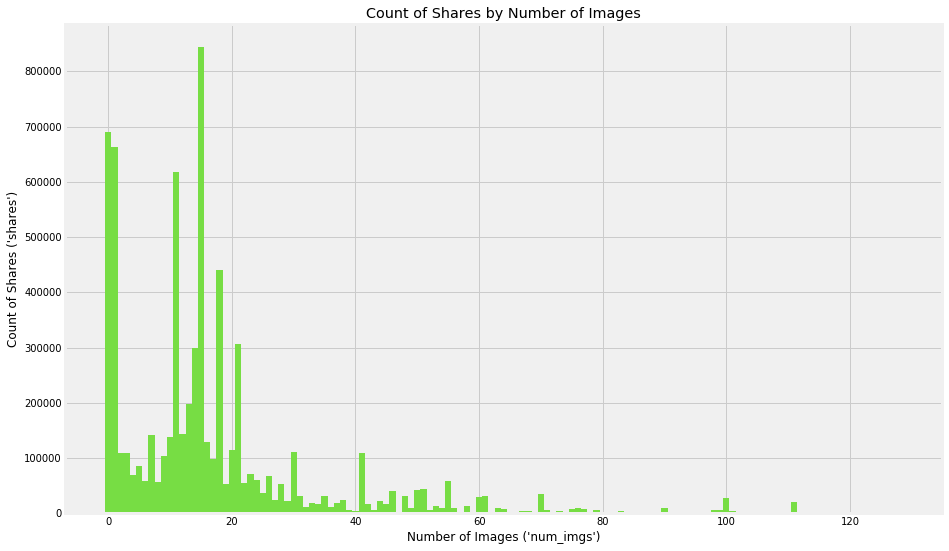

In [123]:
plt.figure(figsize=(14, 9)) 

plt.bar(
    x=np.array(news['num_imgs']),
    height=np.array(news['shares']),
    color='#77dd44',
    width=1,
    alpha=1
) 

plt.title('Count of Shares by Number of Images')
plt.xlabel('Number of Images (\'num_imgs\')')
plt.ylabel('Count of Shares (\'shares\')')

plt.show()

In [134]:
print('num_imgs min: ' + str(min(news['num_imgs'])), 'num_imgs max: ' + str(max(news['num_imgs'])))

num_imgs min: 0.0 num_imgs max: 128.0


How many articles are there with x number of images?

In [135]:
print(news['num_imgs'].value_counts().head(10))

1.0     18119
0.0     6987 
2.0     2965 
3.0     1223 
11.0    1125 
10.0    860  
4.0     668  
12.0    601  
6.0     571  
9.0     546  
Name: num_imgs, dtype: int64


What is the average number of shares for articles with 0 images, 1 image, 2 images, 3 images, 11 images...

In [136]:
shares_count_0 = 0

for entry in news['num_imgs']:
    if entry == 0:
        shares_count_0 = shares_count_0 + news['shares'][entry]

print('Shares total for all articles with 0 images: ' + str(shares_count_0))
print('Average number of shares for articles with 0 images: ' + str(shares_count_0/(sum(news['num_imgs'] == 0))))

Shares total for all articles with 0 images: 4143291
Average number of shares for articles with 0 images: 593.0


In [137]:
shares_count_1 = 0

for entry in news['num_imgs']:
    if entry == 1:
        shares_count_1 = shares_count_1 + news['shares'][entry]

print('Shares total for all articles with 1 image: ' + str(shares_count_1))
print('Average number of shares for articles with 1 image: ' + str(shares_count_1/(sum(news['num_imgs'] == 1))))

Shares total for all articles with 1 image: 12882609
Average number of shares for articles with 1 image: 711.0


In [138]:
shares_count_2 = 0

for entry in news['num_imgs']:
    if entry == 2:
        shares_count_2 = shares_count_2 + news['shares'][entry]

print('Shares total for all articles with 2 images: ' + str(shares_count_2))
print('Average number of shares for articles with 2 images: ' + str(shares_count_2/(sum(news['num_imgs'] == 1))))

Shares total for all articles with 2 images: 4447500
Average number of shares for articles with 2 images: 245.46056625641592


In [139]:
shares_count_3 = 0

for entry in news['num_imgs']:
    if entry == 3:
        shares_count_3 = shares_count_3 + news['shares'][entry]

print('Shares total for all articles with 3 images: ' + str(shares_count_3))
print('Average number of shares for articles with 3 images: ' + str(shares_count_3/(sum(news['num_imgs'] == 3))))

Shares total for all articles with 3 images: 1467600
Average number of shares for articles with 3 images: 1200.0


In [140]:
shares_count_11 = 0

for entry in news['num_imgs']:
    if entry == 11:
        shares_count_11 = shares_count_11 + news['shares'][entry]

print('Shares total for all articles with 11 images: ' + str(shares_count_11))
print('Average number of shares for articles with 11 images: ' + str(shares_count_11/(sum(news['num_imgs'] == 11))))

Shares total for all articles with 11 images: 2137500
Average number of shares for articles with 11 images: 1900.0


In [141]:
shares_count_10 = 0

for entry in news['num_imgs']:
    if entry == 10:
        shares_count_10 = shares_count_10 + news['shares'][entry]

print('Shares total for all articles with 10 images: ' + str(shares_count_10))
print('Average number of shares for articles with 10 images: ' + str(shares_count_10/(sum(news['num_imgs'] == 10))))

Shares total for all articles with 10 images: 1892000
Average number of shares for articles with 10 images: 2200.0


#### If we look at the <b>average</b> number of shares per article's image count, it doesn't match the shares in the same pattern. Let's look at a more detailed graph comparing number of images in the article to number of shares.

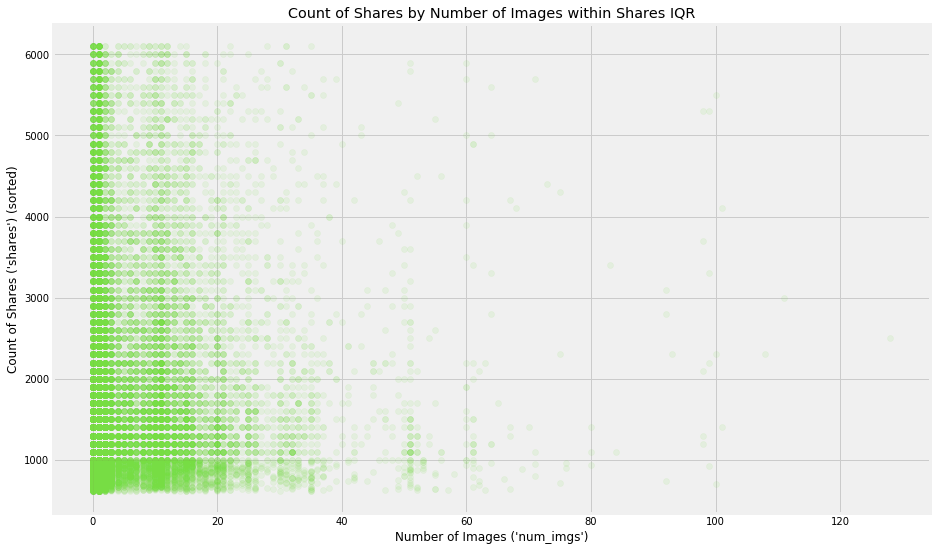

In [142]:
plt.figure(figsize=(14, 9)) 

plt.title('Count of Shares by Number of Images within Shares IQR')
plt.xlabel('Number of Images (\'num_imgs\')')
plt.ylabel('Count of Shares (\'shares\') (sorted)')
plt.scatter(sorted_news['num_imgs'][4029:37250],sorted_news['shares'][4029:37250], alpha=0.1, color='#77dd44', marker='o')

### The scatter plot here shows us more about how the shares are distributed. We can still see the high peaks for each Number of Images, but also a visual of where the Count of Shares is clustering for each. We can see:

- 0 ~ 1 images has pretty even distribution of shares within the IQR
- Since 0 ~ 1 images shares looks fairly solid to the top edge of the IQR, it likely has a lot of outliers above the IQR. (We can see this in a minute)
- We still see there is a significant number of Shares within the 0-20 range of Number of Images, expressing most strongly from 0 Shares to about 2,500 shares. That's not impressive in itself, but it shows us a trend nonetheless.

#### Let's see the graph at full height up to max Shares:

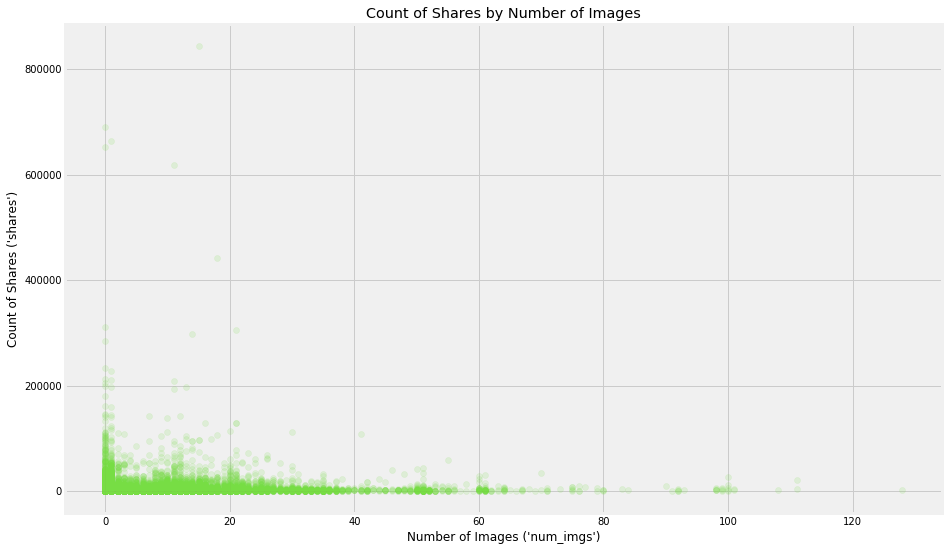

In [143]:
plt.figure(figsize=(14, 9)) 

plt.title('Count of Shares by Number of Images')
plt.xlabel('Number of Images (\'num_imgs\')')
plt.ylabel('Count of Shares (\'shares\')')
plt.scatter(news['num_imgs'],news['shares'], alpha=0.15, color='#77dd44', marker='o')

#### We indeed see the outliers of Shares in the very low Number of Images section, with more indications of moderate success with shares in the ~2-20 range to about 100,000 shares on the high end, but with an average peak more around ~50,000.

Overall, we find that:
- Fewer images on an article generally correlates with more shares
- 0 to 1 images is enough!
- 2 to 20 images in the article returns a decent amount of shares as well
- After about 22 images, we don't see any significant spikes in shares

### We may conclude from this data that more isn't necessarily better when it comes to including images. It may indicate that the article is too long or relies too heavily on images in presenting information in such a way that the article loses value. Maybe the article is too cluttered or makes the page slow to load for those without the fastest internet speed. Perhaps there are too many ads on the page.

### Let's do it all again for videos

# Q.4 How does the video count affect the article?

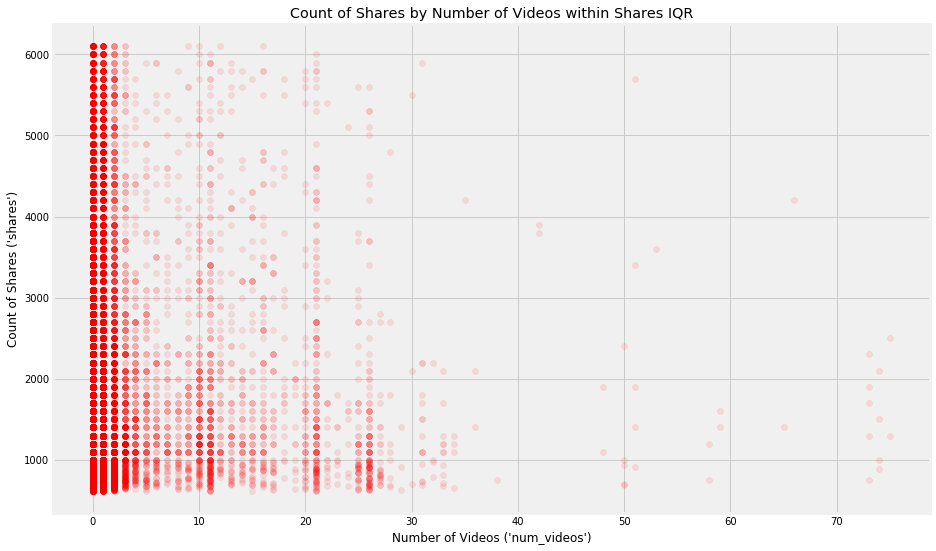

In [144]:
plt.figure(figsize=(14, 9)) 

plt.title('Count of Shares by Number of Videos within Shares IQR')
plt.xlabel('Number of Videos (\'num_videos\')')
plt.ylabel('Count of Shares (\'shares\')')
plt.scatter(sorted_news['num_videos'][4029:37250],sorted_news['shares'][4029:37250], alpha=0.1, color='#ff0000', marker='o')

This is actually similar to the images scatter plot. Here we can see:
- ~0-3 videos per article seem to be strong vertically to the top of the IQR range, still with a lot of variability within each Number of Videos
- The data appears more sparse throughout the rest of the graph compared to the images graph
- There are a few strong indications of upward trend at around 10/11 videos, 21 videos, and 26 videos

Let's take a look at the full height.

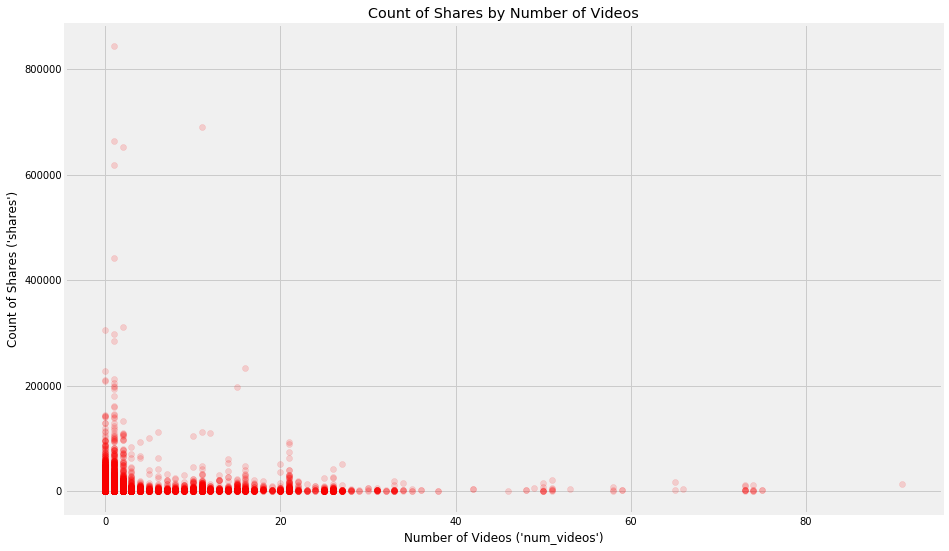

In [145]:
plt.figure(figsize=(14, 9)) 

plt.title('Count of Shares by Number of Videos')
plt.xlabel('Number of Videos (\'num_videos\')')
plt.ylabel('Count of Shares (\'shares\')')
plt.scatter(news['num_videos'],news['shares'], alpha=0.15, color='#ff0000', marker='o')

I think these graphs well represets what anyone could guess about the Number of Videos in relation to Shares. It is clear that articles with 0 to 2 videos is ideal. It may be that the more videos in an article, the more the viewer is overwhelmed or annoyed or the longer the have to wait to load a page. It is shocking to think that a page would have 10 or more videos, let alone over 80. It would be interesting to review the format and content of those articles, but we won't go down that rabbit hole right now.

# Q.5 Does the length of the article affect shares?

'n_tokens_content' is defined for this dataset as: Number of words in the content. <br>
The correltaion with shares is a low 0.0025 or 0.25%. <br>
But I have a hunch about attention spans that I would like to review. I predict that the longer articles willhave fewer shares. Let's take a look.

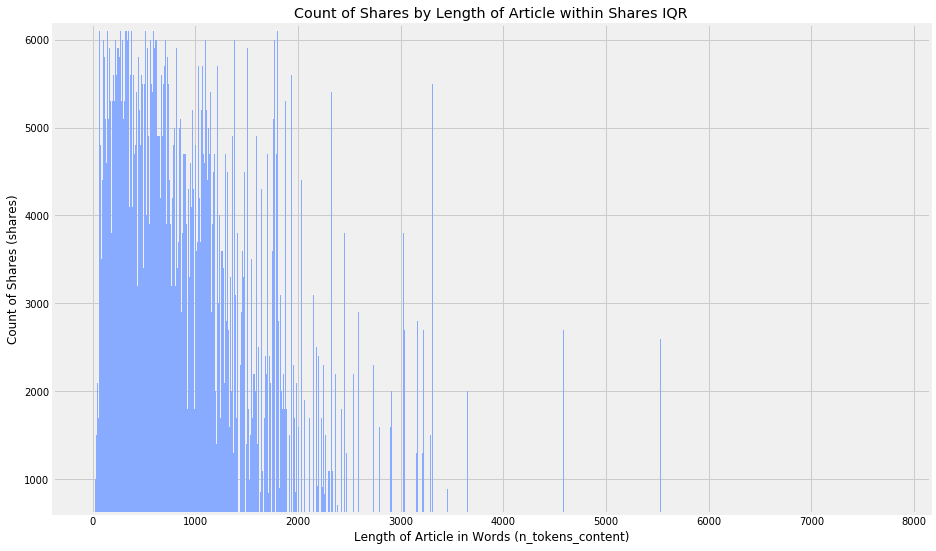

In [156]:
plt.figure(figsize=(14,9))
plt.bar(
    x=np.array(sorted_news['n_tokens_content'][4029:37250]),
    height=np.array(sorted_news['shares'][4029:37250]),
    color='#88aaff',
    width=1,
    alpha=1
) 
plt.title('Count of Shares by Length of Article within Shares IQR')
plt.xlabel('Length of Article in Words (n_tokens_content)')
plt.ylabel('Count of Shares (shares)')
plt.ylim((outlier_below, outlier_limit))
plt.show()

Here we find out a few things:
-  Shares have an initial steep climb to about 200 words
-  There is also a rapid decline after a peak in word count at 200 words, down to practically nothing by length 3,000.
-  It appears word count may affect shares, or at the very least indicates that there is some other attribute of the articles which has a format including few words, but generally has many shares.

Could that format include images or video? Perhaps it has to do with the genre of the article as well.

# Q.6 Is the 'timedelta' data useful?

In our modern use of the internet and social media apps, we can get a lot of feedback very quickly. Especially for a news site like Mashable.com, which, as of November 2015, had over 6,000,000 Twitter followers and over 3,200,000 fans on Facebook<sup>*</sup>, it is safe to say that the majority of shares will happen within the first <b>24 hours</b> or certainly within the <b>first week</b>. With that in mind, let's take a look at our 'timedelta' attribute.

### The dataset's definition of 'timedelta': Days between the article publication and the dataset acquisition

Already a red flag with the first word, "Days," in that definition.<br>
We see below that the data covers about a two-year time frame.

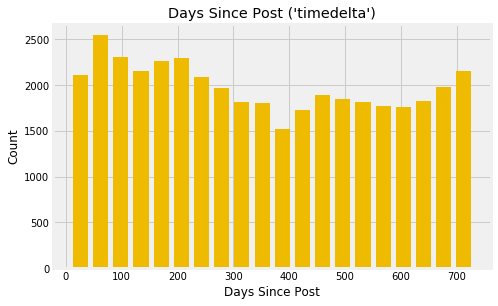

In [151]:
plt.figure(figsize=(7,4.5))
plt.hist(
    x=(news['timedelta']),
    bins=20,
    log=False,
    color='#eebb00',
    rwidth=0.75
) 
plt.title('Days Since Post (\'timedelta\')')
plt.xlabel('Days Since Post')
plt.ylabel('Count')
plt.show()

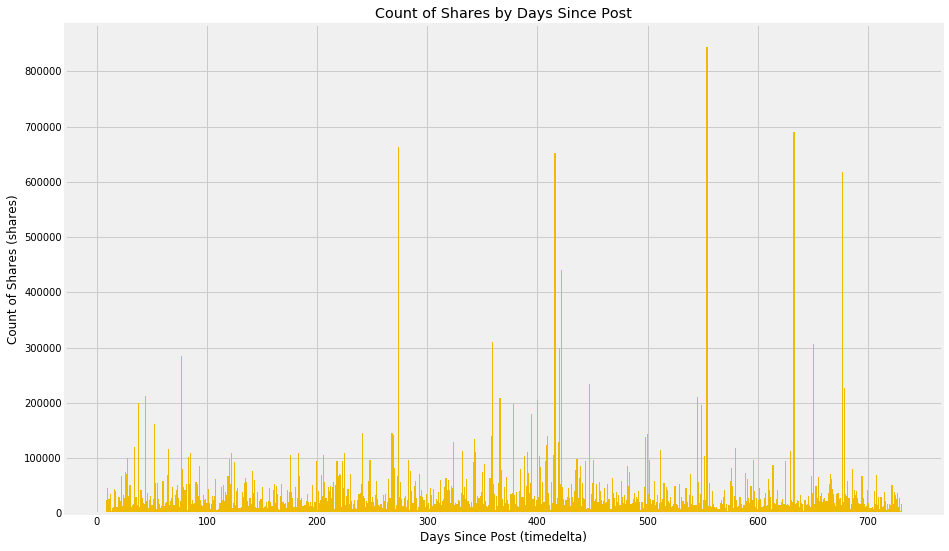

In [150]:
plt.figure(figsize=(14,9))
plt.bar(
    x=np.array(news['timedelta']),
    height=np.array(news['shares']),
    color='#eebb00',
    width=1,
    alpha=1
) 
plt.title('Count of Shares by Days Since Post')
plt.xlabel('Days Since Post (timedelta)')
plt.ylabel('Count of Shares (shares)')
plt.show()

Let's remove everything outside the IQR for Shares., so we can see the deatil a little better within a range that excludes the outliers.

In [152]:
shares_mean = np.mean(news['shares'])
q75, q25 = np.percentile(news['shares'], [75 ,25])
iqr = q75 - q25
iqr = iqr*1.5
outlier_limit = shares_mean + iqr
outlier_below = shares_mean - iqr
outlier_count = 0

for x in news['shares']:
    if x < outlier_below or x > outlier_limit:
        outlier_count +=1
print('outliers: ' + str(outlier_count), '\n'
      'percentage of data points that are outliers: ' + str(outlier_count/len(news) * 100)
     )

print('Outlier limit: ' + str(outlier_limit), '\n'
      'Outlier below: ' + str(outlier_below), '\n'
      'Outlier count: ' + str(outlier_count), '\n'
      'Shares mean: ' + str(shares_mean))

outliers: 6422 
percentage of data points that are outliers: 16.199172636464535
Outlier limit: 6176.3801836343455 
Outlier below: 614.3801836343455 
Outlier count: 6422 
Shares mean: 3395.3801836343455


Let's cut out those outliers from our data, just to see the visualization better.

In [153]:
trunc_shares2 = np.where(np.logical_and(sorted_news['shares'] >= outlier_below, sorted_news['shares'] <= outlier_limit))
print(trunc_shares2)
# this shows us the indices of the 25th and 75th percentiles for 'shares', giving us the IQR range

(array([ 4029,  4030,  4031, ..., 37248, 37249, 37250], dtype=int64),)


So we use the indexes 4029 and 37250 to indicate the IQR range....

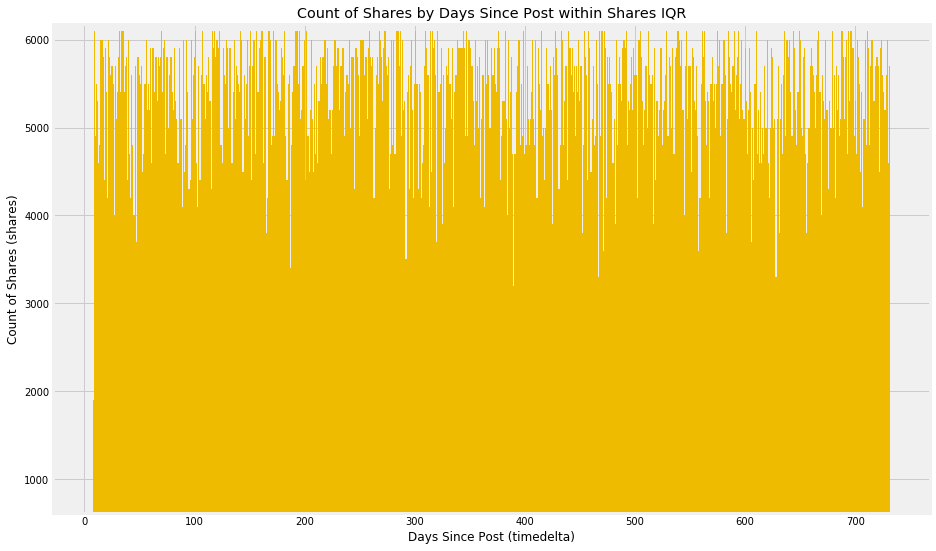

In [154]:
plt.figure(figsize=(14,9))
plt.bar(
    x=np.array(sorted_news['timedelta'][4029:37250]),
    height=np.array(sorted_news['shares'][4029:37250]),
    color='#eebb00',
    width=1,
    alpha=1
) 
plt.title('Count of Shares by Days Since Post within Shares IQR')
plt.xlabel('Days Since Post (timedelta)')
plt.ylabel('Count of Shares (shares)')
plt.ylim((outlier_below, outlier_limit))
plt.show()

Now that we have sampled the IQR to remove the Shares outliers, we can see the data a little more clearly. Setting the y axis limits to match the IQR limits also gives us more "zoomed" detail on the graph. From this graph we can deduce:
-  There is no clear pattern indicated by the timedelta in relation to shares
-  The length of time any given article has been posted does not affect the number of shares in a significant way

Let's check out the gap between timedelta 0 and ~20 to see whats going on there.

In [155]:
print('Lowest number of days since post: ' + str(min(news['timedelta'])))

Lowest number of days since post: 8.0


I expected the timedelta would not significantly affect the shares here. There are no timedeltas shorter than 8 days, accounting for the gap in the visualizations; with modern tech and connectivity, if an article or video is posted, it is normally expected to get most of its shares within the first 24 hours of posting. However, we don't have data that granular from this set, so it's not something we an check! This is data we do not gain much from as-is, but it adds evidence to the idea that content is the most important aspect of the article.

# Actionable Items

## From this analysis we have gained a more directed approach on how to continue testing for better share results.
- Images can enhance an article, but many images are not necessary for a high number of shares.
- The same goes for videos, 0 to 2 videos is ideal.
- The number of words in an article would should be 200 to 1,000 words for the greatest return on shares.
- We know we can throw out the 'timedelta' data from this dataset, as it is not granular enough.

## What we learn from this data overall is that less an often be more! If we continue to look at the data, I think that the genres and sentiment will have more affect, but for now, we can save time by making our articles shorter, with fewer images and videos, and instead put more time and energy into content.

# Further research

Considering this dataset had a relatively weak set of correlations, I recommend collecting more data points, and of course more up-to-date data. The timedelta would be more useful by the hour-since-post in the first 24 hours, instead of by days-since-post. More advanced sentiment analysis could be considered, as well. To better gauge how people are liking an article, add likes, time viewing page, and an equation of timedelta by likes or shares. An article's publishing date/hour and shares (or likes) date/hour may help determine what pushes an article to have top shares, or when is the best time to post.

## Looking into sentiment compared to different genres and LDA Topics

### LDA topics are noted as 0 through 4, but we don't know to what they are referring. What is LDA anyway?

In [146]:
lda_and_genre = news[['LDA_00',
                  'LDA_01',
                  'LDA_02',
                  'LDA_03',
                  'LDA_04',
                  'data_channel_is_lifestyle',
                  'data_channel_is_entertainment',
                  'data_channel_is_bus',
                  'data_channel_is_socmed',
                  'data_channel_is_tech',
                  'data_channel_is_world']].copy()
lda_and_genre.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
LDA_00,1.0,-0.18,-0.26,-0.27,-0.24,-0.0068,-0.21,0.77,0.2,-0.2,-0.23
LDA_01,-0.18,1.0,-0.23,-0.12,-0.25,-0.081,0.6,-0.13,-0.07,-0.17,-0.21
LDA_02,-0.26,-0.23,1.0,-0.33,-0.23,-0.12,-0.21,-0.21,-0.019,-0.18,0.84
LDA_03,-0.27,-0.12,-0.33,1.0,-0.36,-0.063,0.21,-0.23,-0.038,-0.26,-0.27
LDA_04,-0.24,-0.25,-0.23,-0.36,1.0,0.25,-0.27,-0.17,-0.068,0.75,-0.18
data_channel_is_lifestyle,-0.0068,-0.081,-0.12,-0.063,0.25,1.0,-0.11,-0.1,-0.059,-0.11,-0.12
data_channel_is_entertainment,-0.21,0.6,-0.21,0.21,-0.27,-0.11,1.0,-0.2,-0.12,-0.22,-0.24
data_channel_is_bus,0.77,-0.13,-0.21,-0.23,-0.17,-0.1,-0.2,1.0,-0.11,-0.21,-0.22
data_channel_is_socmed,0.2,-0.07,-0.019,-0.038,-0.068,-0.059,-0.12,-0.11,1.0,-0.12,-0.13
data_channel_is_tech,-0.2,-0.17,-0.18,-0.26,0.75,-0.11,-0.22,-0.21,-0.12,1.0,-0.25


##### We can see the attributes indicating the genre of the article, Lifestyle, Entertainment, Business, Social Media, Tech, and World, are generally correlated with the LDA attributes.

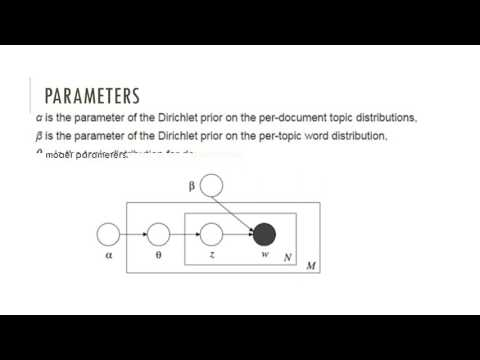

In [147]:
YouTubeVideo('DWJYZq_fQ2A')

In general, Latent Dirichlet Allocation determines the occurrance of topics over mutiple texts and compares the occurances of topics between them. We could compare which topics/genres in combination with positive or negative sentiments garner more shares, likes, page views, etc. Generally drama sells, but that can't <i>always</i> be the case.

<sub>*Wikipedia: https://en.wikipedia.org/wiki/Mashable#History</sub>